In [1]:
import matplotlib.pyplot as pylab

pylab.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

import gwnr

# c = pycbc.catalog.Catalog()
c = gwnr.analysis.Catalog()

# Names of mergers in the catalog and
# Approximate GPS time of the mergers
for n, t in zip(c.names, c):
    m = c[t]
    print("Time of {0}: {1}; IFOs: {2}".format(
        n, m.time, list(set([s['detector'] for s in m.data['strain']]))))


Time of GW150914-v3: 1126259462.4; IFOs: ['L1', 'H1']
Time of GW151012-v3: 1128678900.4; IFOs: ['L1', 'H1']
Time of GW151226-v2: 1135136350.6; IFOs: ['L1', 'H1']
Time of GW170104-v2: 1167559936.6; IFOs: ['L1', 'H1']
Time of GW170608-v3: 1180922494.5; IFOs: ['L1', 'H1']
Time of GW170729-v1: 1185389807.3; IFOs: ['L1', 'V1', 'H1']
Time of GW170809-v1: 1186302519.8; IFOs: ['L1', 'V1', 'H1']
Time of GW170814-v3: 1186741861.5; IFOs: ['L1', 'V1', 'H1']
Time of GW170817-v3: 1187008882.4; IFOs: ['G1', 'L1', 'V1', 'H1']
Time of GW170818-v1: 1187058327.1; IFOs: ['L1', 'V1', 'H1']
Time of GW170823-v1: 1187529256.5; IFOs: ['L1', 'H1']


/home/prayush/miniconda3/envs/lalsuite-dev/lib/python3.9/site-packages/pandas/core/common.py:208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


## Catalog of Mergers

In [2]:
for l in list(c['GW170608'].data.keys()):
    print(l)

GPS
catalog.shortName
chi_eff
chi_eff_lower
chi_eff_unit
chi_eff_upper
chirp_mass
chirp_mass_lower
chirp_mass_source
chirp_mass_source_lower
chirp_mass_source_unit
chirp_mass_source_upper
chirp_mass_unit
chirp_mass_upper
commonName
far
far_lower
far_unit
far_upper
final_mass_source
final_mass_source_lower
final_mass_source_unit
final_mass_source_upper
jsonurl
luminosity_distance
luminosity_distance_lower
luminosity_distance_unit
luminosity_distance_upper
mass_1_source
mass_1_source_lower
mass_1_source_unit
mass_1_source_upper
mass_2_source
mass_2_source_lower
mass_2_source_unit
mass_2_source_upper
network_matched_filter_snr
network_matched_filter_snr_lower
network_matched_filter_snr_unit
network_matched_filter_snr_upper
redshift
redshift_lower
redshift_unit
redshift_upper
reference
strain
total_mass_source
total_mass_source_lower
total_mass_source_unit
total_mass_source_upper
version


In [3]:
# Print useful parameters
mass1, emass1low, emass1high = c.median1d('mass1', return_errors=True)
for n, m1, em1l, em1h in zip(c.names, mass1, emass1low, emass1high):
    print(";Mass1 of {0} $\in$ [{1}, {2}]".format(n, m1 - em1l, m1 + em1h))
print('\n')

mass2, emass2low, emass2high = c.median1d('mass2', return_errors=True)
for n, m2, em2l, em2h in zip(c.names, mass2, emass2low, emass2high):
    print(";Mass2 of {0} $\in$ [{1}, {2}]".format(n, m2 - em2l, m2 + em2h))
print('\n')

mtotal = mass1 + mass2
emtlow = emass1low + emass2low
emthigh = emass1high + emass2high

for n, mt, emtl, emth in zip(c.names, mtotal, emtlow, emthigh):
    print(";Total mass of {0} $\in$ [{1}, {2}]".format(n, mt - emtl,
                                                       mt + emth))


;Mass1 of GW150914-v3 $\in$ [38.7, 40.300000000000004]
;Mass1 of GW151012-v3 $\in$ [28.7, 38.1]
;Mass1 of GW151226-v2 $\in$ [16.9, 22.5]
;Mass1 of GW170104-v2 $\in$ [36.4, 38.1]
;Mass1 of GW170608-v3 $\in$ [12.7, 16.5]
;Mass1 of GW170729-v1 $\in$ [60.400000000000006, 66.4]
;Mass1 of GW170809-v1 $\in$ [40.9, 43.3]
;Mass1 of GW170814-v3 $\in$ [33.6, 36.2]
;Mass1 of GW170817-v3 $\in$ [1.56, 1.58]
;Mass1 of GW170818-v1 $\in$ [40.1, 42.9]
;Mass1 of GW170823-v1 $\in$ [46.2, 50.7]


;Mass2 of GW150914-v3 $\in$ [35.0, 33.6]
;Mass2 of GW151012-v3 $\in$ [18.4, 17.7]
;Mass2 of GW151226-v2 $\in$ [10.2, 9.9]
;Mass2 of GW170104-v2 $\in$ [24.6, 24.9]
;Mass2 of GW170608-v3 $\in$ [9.8, 9.0]
;Mass2 of GW170729-v1 $\in$ [44.1, 43.1]
;Mass2 of GW170809-v1 $\in$ [29.0, 28.9]
;Mass2 of GW170814-v3 $\in$ [29.2, 28.0]
;Mass2 of GW170817-v3 $\in$ [1.36, 1.36]
;Mass2 of GW170818-v1 $\in$ [31.9, 31.0]
;Mass2 of GW170823-v1 $\in$ [36.8, 35.7]


;Total mass of GW150914-v3 $\in$ [73.7, 73.9]
;Total mass of GW151012

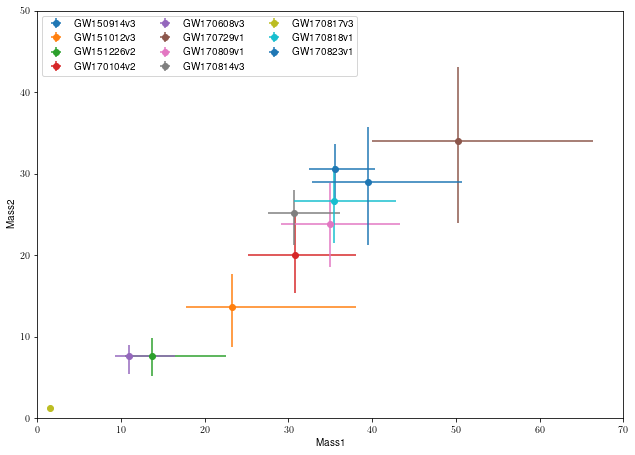

In [4]:
pylab.figure(figsize=(1.5 * 7, 1.5 * 5))
for n, m1, m2, em1l, em1h, em2l, em2h in zip(c.names, mass1, mass2, emass1low,
                                             emass1high, emass2low,
                                             emass2high):
    pylab.errorbar([m1],
                   [m2],
                   fmt='o',
                   label=n.replace('-',''),
                   xerr=[[-em1l], [em1h]],
                   yerr=[[-em2l], [em2h]])
pylab.xlabel('Mass1')
pylab.ylabel('Mass2')
pylab.xlim(0, 70)
pylab.ylim(0, 50)
pylab.legend(ncol=len(c.names)//3, loc='upper left')


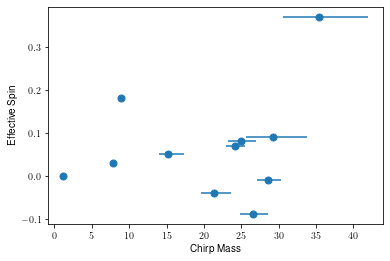

In [5]:
mchirp, elow, ehigh = c.median1d('mchirp', return_errors=True)
spin = c.median1d('chi_eff')

pylab.errorbar(mchirp, spin, xerr=[-elow, ehigh], fmt='o', markersize=7)
pylab.xlabel('Chirp Mass')
#pylab.xscale('log')
pylab.ylabel('Effective Spin')
pylab.show()

## One Merger

<ipython-input-6-58c454f427f4>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pylab.pcolormesh(times, freqs, power**0.5, vmax=5)


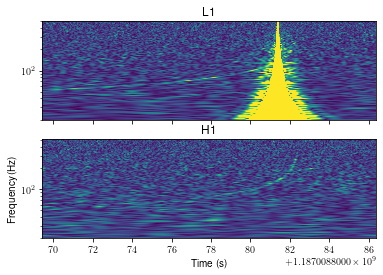

In [6]:
m = gwnr.analysis.Merger("GW170817")

fig, axs = pylab.subplots(2, 1, sharex=True, sharey=True)
for ifo, ax in zip(["L1", "H1"], axs):
    pylab.sca(ax)
    pylab.title(ifo)
    # Retreive data around the BNS merger
    ts = m.strain(ifo).time_slice(m.time - 15, m.time + 6)

    # Whiten the data with a 4s filter
    white = ts.whiten(4, 4)

    times, freqs, power = white.qtransform(.01, logfsteps=200,
                                        qrange=(110, 110),
                                        frange=(20, 512))
    pylab.pcolormesh(times, freqs, power**0.5, vmax=5)

pylab.yscale('log')
pylab.ylabel("Frequency (Hz)")
pylab.xlabel("Time (s)")
pylab.show()

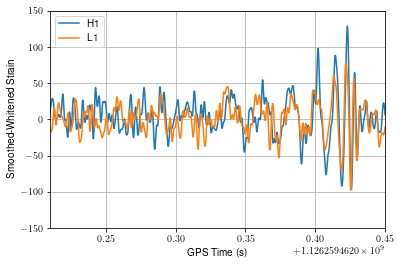

In [7]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger
import pylab

for ifo in ['H1', 'L1']:
    # Read data and remove low frequency content
    h1 = Merger("GW150914").strain(ifo)
    h1 = highpass_fir(h1, 15, 8)

    # Calculate the noise spectrum
    psd = interpolate(welch(h1), 1.0 / h1.duration)

    # whiten
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()

    # remove some of the high and low
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(white_strain, 300, 8)

    # time shift and flip L1
    if ifo == 'L1':
        smooth *= -1
        smooth.roll(int(.007 / smooth.delta_t))

    pylab.plot(smooth.sample_times, smooth, label=ifo)

pylab.legend()
pylab.xlim(1126259462.21, 1126259462.45)
pylab.ylim(-150, 150)
pylab.ylabel('Smoothed-Whitened Strain')
pylab.grid()
pylab.xlabel('GPS Time (s)')
pylab.show()

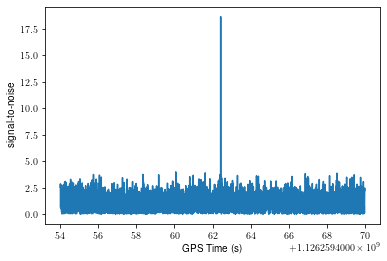

In [8]:
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, matched_filter
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate
try:
    from urllib.request import urlretrieve
except ImportError:  # python < 3
    from urllib import urlretrieve

# Read data and remove low frequency content
fname = 'H-H1_LOSC_4_V2-1126259446-32.gwf'
url = "https://www.gw-openscience.org/GW150914data/" + fname
urlretrieve(url, filename=fname)
h1 = read_frame('H-H1_LOSC_4_V2-1126259446-32.gwf', 'H1:LOSC-STRAIN')
h1 = highpass_fir(h1, 15, 8)

# Calculate the noise spectrum
psd = interpolate(welch(h1), 1.0 / h1.duration)

# Generate a template to filter with
hp, hc = get_fd_waveform(approximant="IMRPhenomD", mass1=40, mass2=32,
                         f_lower=20, delta_f=1.0/h1.duration)
hp.resize(len(h1) // 2 + 1)

# Calculate the complex (two-phase SNR)
snr = matched_filter(hp, h1, psd=psd, low_frequency_cutoff=20.0)

# Remove regions corrupted by filter wraparound
snr = snr[len(snr) // 4: len(snr) * 3 // 4]

import pylab
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('signal-to-noise')
pylab.xlabel('GPS Time (s)')
pylab.show()